# Verify points for other actors

--> Transport Levers:
      
      
      
    
--> OVerijsel
    
    
    
--> Gelderland
    
    
    
--> Environmentalist
    
    
    
--> DC?
    
    
    

In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter
from ema_workbench.em_framework.samplers import sample_uncertainties
# from ema_workbench.em_framework.evaluators import MC
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(5)

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Transport company

In [22]:
# setup the policies
from ema_workbench import Policy
policy_dict = {'0_RfR 0':1, 
               '0_RfR 1':1,
               '0_RfR 2':1,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}

pols = Policy('RFR policy', **policy_dict)

In [23]:
print("starting")
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100,               #500
                                            policies=pols, reporting_interval=100)


# save_results(results, './transport.tar.gz')

starting


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
experiments, outcomes = results

In [25]:
data = pd.DataFrame.from_dict(outcomes)

In [26]:
data

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1.099181e+09,0,253800000.0,0.0,2.552367
1,1.806630e+09,0,253800000.0,0.0,2.469440
2,5.551847e+08,0,253800000.0,0.0,0.557139
3,1.345027e+09,0,253800000.0,0.0,2.559457
4,1.336987e+09,0,253800000.0,0.0,1.634590
...,...,...,...,...,...
95,1.606498e+08,0,253800000.0,0.0,0.185652
96,4.547610e+08,0,253800000.0,0.0,0.582112
97,2.464230e+08,0,253800000.0,0.0,0.186876
98,1.896566e+08,0,253800000.0,0.0,0.238531


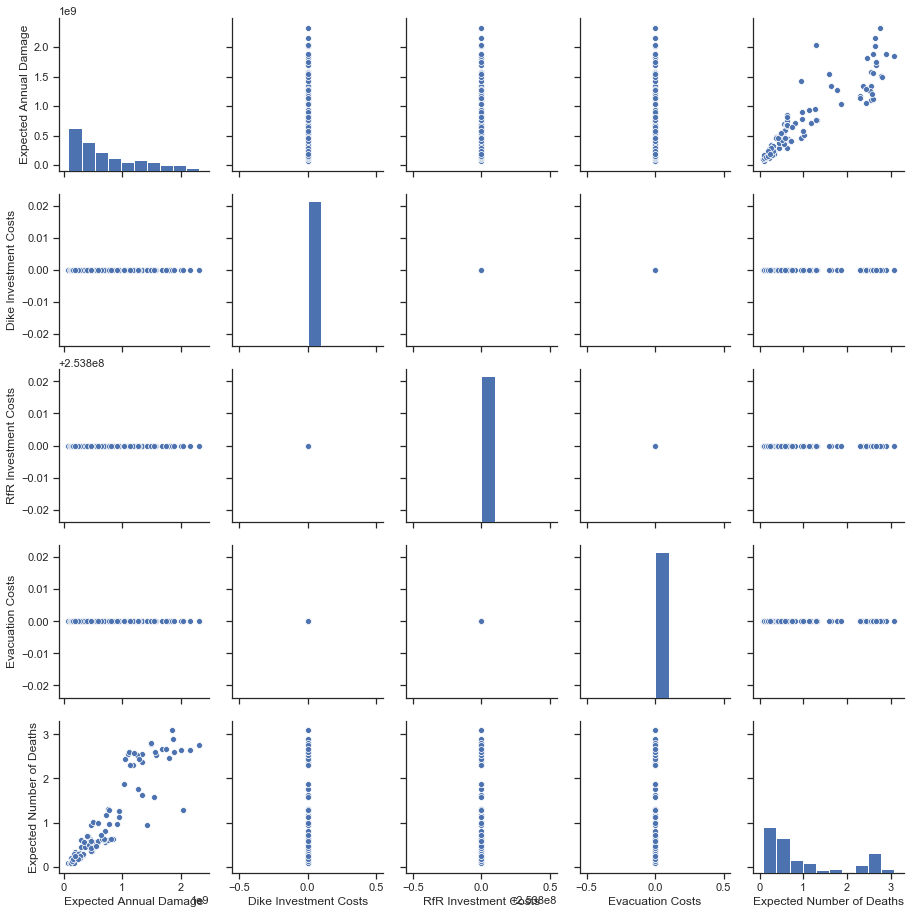

In [27]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd;

sns.pairplot(data,vars=list(outcomes.keys()), diag_kind='hist')
plt.show()

## Gelderland

In [3]:
from ema_workbench import Policy

policy_dict_gel = {'0_RfR 0':0, 
               '0_RfR 1':0,
               '0_RfR 2':0,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':7,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':7,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':4,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':4,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':3,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}

pols_gel = Policy('Preferred_policy_Gel', **policy_dict_gel)

In [4]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_gel, reporting_interval=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
save_results(results, './Gelderland.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\teres\Documents\EPA1361-Model-based Decison Making\EPA1361\final assignment\Gelderland.tar.gz


# as per request

In [35]:
# setup the policies
from ema_workbench import Policy
policy_dict_base_request = {'0_RfR 0':1, 
               '0_RfR 1':1,
               '0_RfR 2':1,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
policy_dict_base_request_2 = {'0_RfR 0':0, 
               '0_RfR 1':0,
               '0_RfR 2':0,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':1,
               '3_RfR 1':1,
               '3_RfR 2':1,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
pols_request = [Policy('RFR policy 1', **policy_dict_base_request), Policy('RFR policy 4', **policy_dict_base_request_2) ]

In [39]:
dike_model.n = 200
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_request[0], reporting_interval=100)
save_results(results, './baseRequest1.tar.gz')
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_request[1], reporting_interval=100)
save_results(results, './baseRequest4.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/baseRequest1.tar.gz
[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases 

In [ ]:
results1= load_results('./baseRequest1.tar.gz')
results4 = load_results('./baseRequest4.tar.gz')

In [ ]:
experiments1, outcomes1 = results1
data1 = pd.DataFrame.from_dict(outcomes1)
data1.head(5)
experiments4, outcomes4 = results4
data4 = pd.DataFrame.from_dict(outcomes4)
data4.head(5)

In [ ]:
for x in range(1, 6):
    dam_list = data1.filter(like='A.'+str(x)+'_Expected Annual Damage').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_damage'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_damage'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

    dam_list = data1.filter(like='A.'+str(x)+'_Dike Investment Costs').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_costs'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_costs'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

    dam_list = data1.filter(like='A.'+str(x)+'_Expected Number of Deaths').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_death'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_death'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

rfr_list = data1.filter(like='RfR').columns
data1['total-RfR'] = data1[rfr_list].sum(axis=1)
data1.drop(columns=rfr_list, inplace=True)

data4['total-RfR'] = data4[rfr_list].sum(axis=1)
data4.drop(columns=rfr_list, inplace=True)

evac_list = data1.filter(like='Evacuation').columns
data1['total-evacuation'] = data1[evac_list].sum(axis=1)
data1.drop(columns=evac_list, inplace=True)

data4['total-evacuation'] = data4[evac_list].sum(axis=1)
data4.drop(columns=evac_list, inplace=True)

data1.head(5)


In [ ]:
sns.pairplot(data1, vars=list(data1.columns), diag_kind='hist')
plt.show()

In [ ]:
sns.pairplot(data4, vars=list(data4.columns), diag_kind='hist')
plt.show()

In [ ]:
dam_list = data1.filter(like='damage').columns
# print(data.filter(like='Damage').columns)
data1['total-damage'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='damage').columns
data4['total-damage'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

dam_list = data1.filter(like='costs').columns
# print(data.filter(like='Damage').columns)
data1['total-costs'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='costs').columns
data4['total-costs'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

dam_list = data1.filter(like='death').columns
# print(data.filter(like='Damage').columns)
data1['total-death'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='death').columns
data4['total-death'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

In [ ]:
results = load_results('./baseRequest.tar.gz')

In [40]:
dike_model.n = 80
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_request[0], reporting_interval=100)
save_results(results, './baseRequest1-80years.tar.gz')
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_request[1], reporting_interval=100)
save_results(results, './baseRequest4-80years.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/baseRequest1-80years.tar.gz
[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 50

In [ ]:
results = load_results('./baseRequest-80years.tar.gz')

In [41]:
pol_1 = {'0_RfR 0':1, 
               '0_RfR 1':1,
               '0_RfR 2':1,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
pol_4 = {'0_RfR 0':0, 
               '0_RfR 1':0,
               '0_RfR 2':0,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':1,
               '3_RfR 1':1,
               '3_RfR 2':1,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
pols_request_1 = []
pols_request_4 = []

for x in range(1, 11):
    pol_1.update({'A.2_DikeIncrease 0':x, 'A.2_DikeIncrease 1':x, 'A.2_DikeIncrease 2':x, 'A.3_DikeIncrease 0':x, 'A.3_DikeIncrease 1':x, 'A.3_DikeIncrease 2':x,
                 'A.4_DikeIncrease 0':x, 'A.4_DikeIncrease 1':x, 'A.4_DikeIncrease 2':x,'A.5_DikeIncrease 0':x, 'A.5_DikeIncrease 1':x, 'A.5_DikeIncrease 2':x})
    pols_request_1.append(Policy('RFR policy 1 bridge'+str(x), **pol_1))
    pol_4.update({'A.2_DikeIncrease 0':x, 'A.2_DikeIncrease 1':x, 'A.2_DikeIncrease 2':x, 'A.3_DikeIncrease 0':x, 'A.3_DikeIncrease 1':x, 'A.3_DikeIncrease 2':x,
                 'A.1_DikeIncrease 0':x, 'A.1_DikeIncrease 1':x, 'A.1_DikeIncrease 2':x,'A.5_DikeIncrease 0':x, 'A.5_DikeIncrease 1':x, 'A.5_DikeIncrease 2':x})
    pols_request_4.append(Policy('RFR policy 4 bridge'+str(x), **pol_4))
# print(pols_request)

In [42]:
dike_model.n = 200
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 100,               #500
                                            policies=pols_request_1, reporting_interval=100)
save_results(results, './requestbridges1.tar.gz')
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 100,               #500
                                            policies=pols_request_4, reporting_interval=100)
save_results(results, './requestbridges4.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 10 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/requestbridges1.tar.gz
[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 10 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cas

In [63]:
results1= load_results('./requestbridges1.tar.gz')
results4 = load_results('./requestbridges4.tar.gz')

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/requestbridges1.tar.gz
[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/requestbridges4.tar.gz


In [64]:
experiments1, outcomes1 = results1
data1 = pd.DataFrame.from_dict(outcomes1)
data1.head(5)
experiments4, outcomes4 = results4
data4 = pd.DataFrame.from_dict(outcomes4)
data4.head(5)

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,3.216193e+07,3.269490e+07,0.022240,1.309201e+08,3.824512e+07,0.111202,0.000000e+00,2.029929e+07,0.000000,0.000000,...,2.171028e+07,0.000000,9.572700e+05,0,0.000326,0.0,2.677753e+07,0.0,121200000.0,0.0
1,7.756147e+08,3.269490e+07,0.619753,6.761166e+06,3.824512e+07,0.007345,7.036145e+07,2.029929e+07,0.139745,0.000000,...,2.171028e+07,0.013625,0.000000e+00,0,0.000000,0.0,2.677753e+07,0.0,121200000.0,0.0
2,0.000000e+00,3.269490e+07,0.000000,0.000000e+00,3.824512e+07,0.000000,2.504867e+07,2.029929e+07,0.066015,169142.420253,...,2.171028e+07,0.031611,2.556248e+06,0,0.000908,0.0,2.677753e+07,0.0,121200000.0,0.0
3,8.668029e+06,3.269490e+07,0.006090,0.000000e+00,3.824512e+07,0.000000,0.000000e+00,2.029929e+07,0.000000,0.000000,...,2.171028e+07,0.000000,0.000000e+00,0,0.000000,0.0,2.677753e+07,0.0,121200000.0,0.0
4,0.000000e+00,3.269490e+07,0.000000,2.515929e+08,3.824512e+07,0.161357,0.000000e+00,2.029929e+07,0.000000,0.000000,...,2.171028e+07,0.000000,0.000000e+00,0,0.000000,0.0,2.677753e+07,0.0,121200000.0,0.0


In [65]:
for x in range(1, 6):
    dam_list = data1.filter(like='A.'+str(x)+'_Expected Annual Damage').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_damage'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_damage'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

    dam_list = data1.filter(like='A.'+str(x)+'_Dike Investment Costs').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_costs'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_costs'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

    dam_list = data1.filter(like='A.'+str(x)+'_Expected Number of Deaths').columns
    # print(data.filter(like='Damage').columns)
    data1['A.'+str(x)+'_death'] = data1[dam_list].sum(axis=1)
    data1.drop(columns=dam_list, inplace=True)
    
    data4['A.'+str(x)+'_death'] = data4[dam_list].sum(axis=1)
    data4.drop(columns=dam_list, inplace=True)

rfr_list = data1.filter(like='RfR').columns
data1['total-RfR'] = data1[rfr_list].sum(axis=1)
data1.drop(columns=rfr_list, inplace=True)

data4['total-RfR'] = data4[rfr_list].sum(axis=1)
data4.drop(columns=rfr_list, inplace=True)

evac_list = data1.filter(like='Evacuation').columns
data1['total-evacuation'] = data1[evac_list].sum(axis=1)
data1.drop(columns=evac_list, inplace=True)

data4['total-evacuation'] = data4[evac_list].sum(axis=1)
data4.drop(columns=evac_list, inplace=True)

data1.head(5)


,A.1_damage,A.1_costs,A.1_death,A.2_damage,A.2_costs,A.2_death,A.3_damage,A.3_costs,A.3_death,A.4_damage,A.4_costs,A.4_death,A.5_damage,A.5_costs,A.5_death,total-RfR,total-evacuation
0,0.0,0,0.0,3.316455e+07,1.187006e+08,0.041355,6.456016e+07,6.300250e+07,0.157158,0.000000e+00,1.961774e+07,0.000000,9.492654e+07,7.770751e+07,0.116696,253800000.0,0.0
1,0.0,0,0.0,0.000000e+00,1.187006e+08,0.000000,2.824119e+08,6.300250e+07,0.648096,0.000000e+00,1.961774e+07,0.000000,0.000000e+00,7.770751e+07,0.000000,253800000.0,0.0
2,0.0,0,0.0,2.375490e+06,1.187006e+08,0.002261,0.000000e+00,6.300250e+07,0.000000,4.962970e+07,1.961774e+07,0.026525,4.113014e+07,7.770751e+07,0.038728,253800000.0,0.0
3,0.0,0,0.0,1.226399e+08,1.187006e+08,0.129495,0.000000e+00,6.300250e+07,0.000000,0.000000e+00,1.961774e+07,0.000000,0.000000e+00,7.770751e+07,0.000000,253800000.0,0.0
4,0.0,0,0.0,9.424872e+07,1.187006e+08,0.066866,1.481349e+08,6.300250e+07,0.198102,0.000000e+00,1.961774e+07,0.000000,0.000000e+00,7.770751e+07,0.000000,253800000.0,0.0


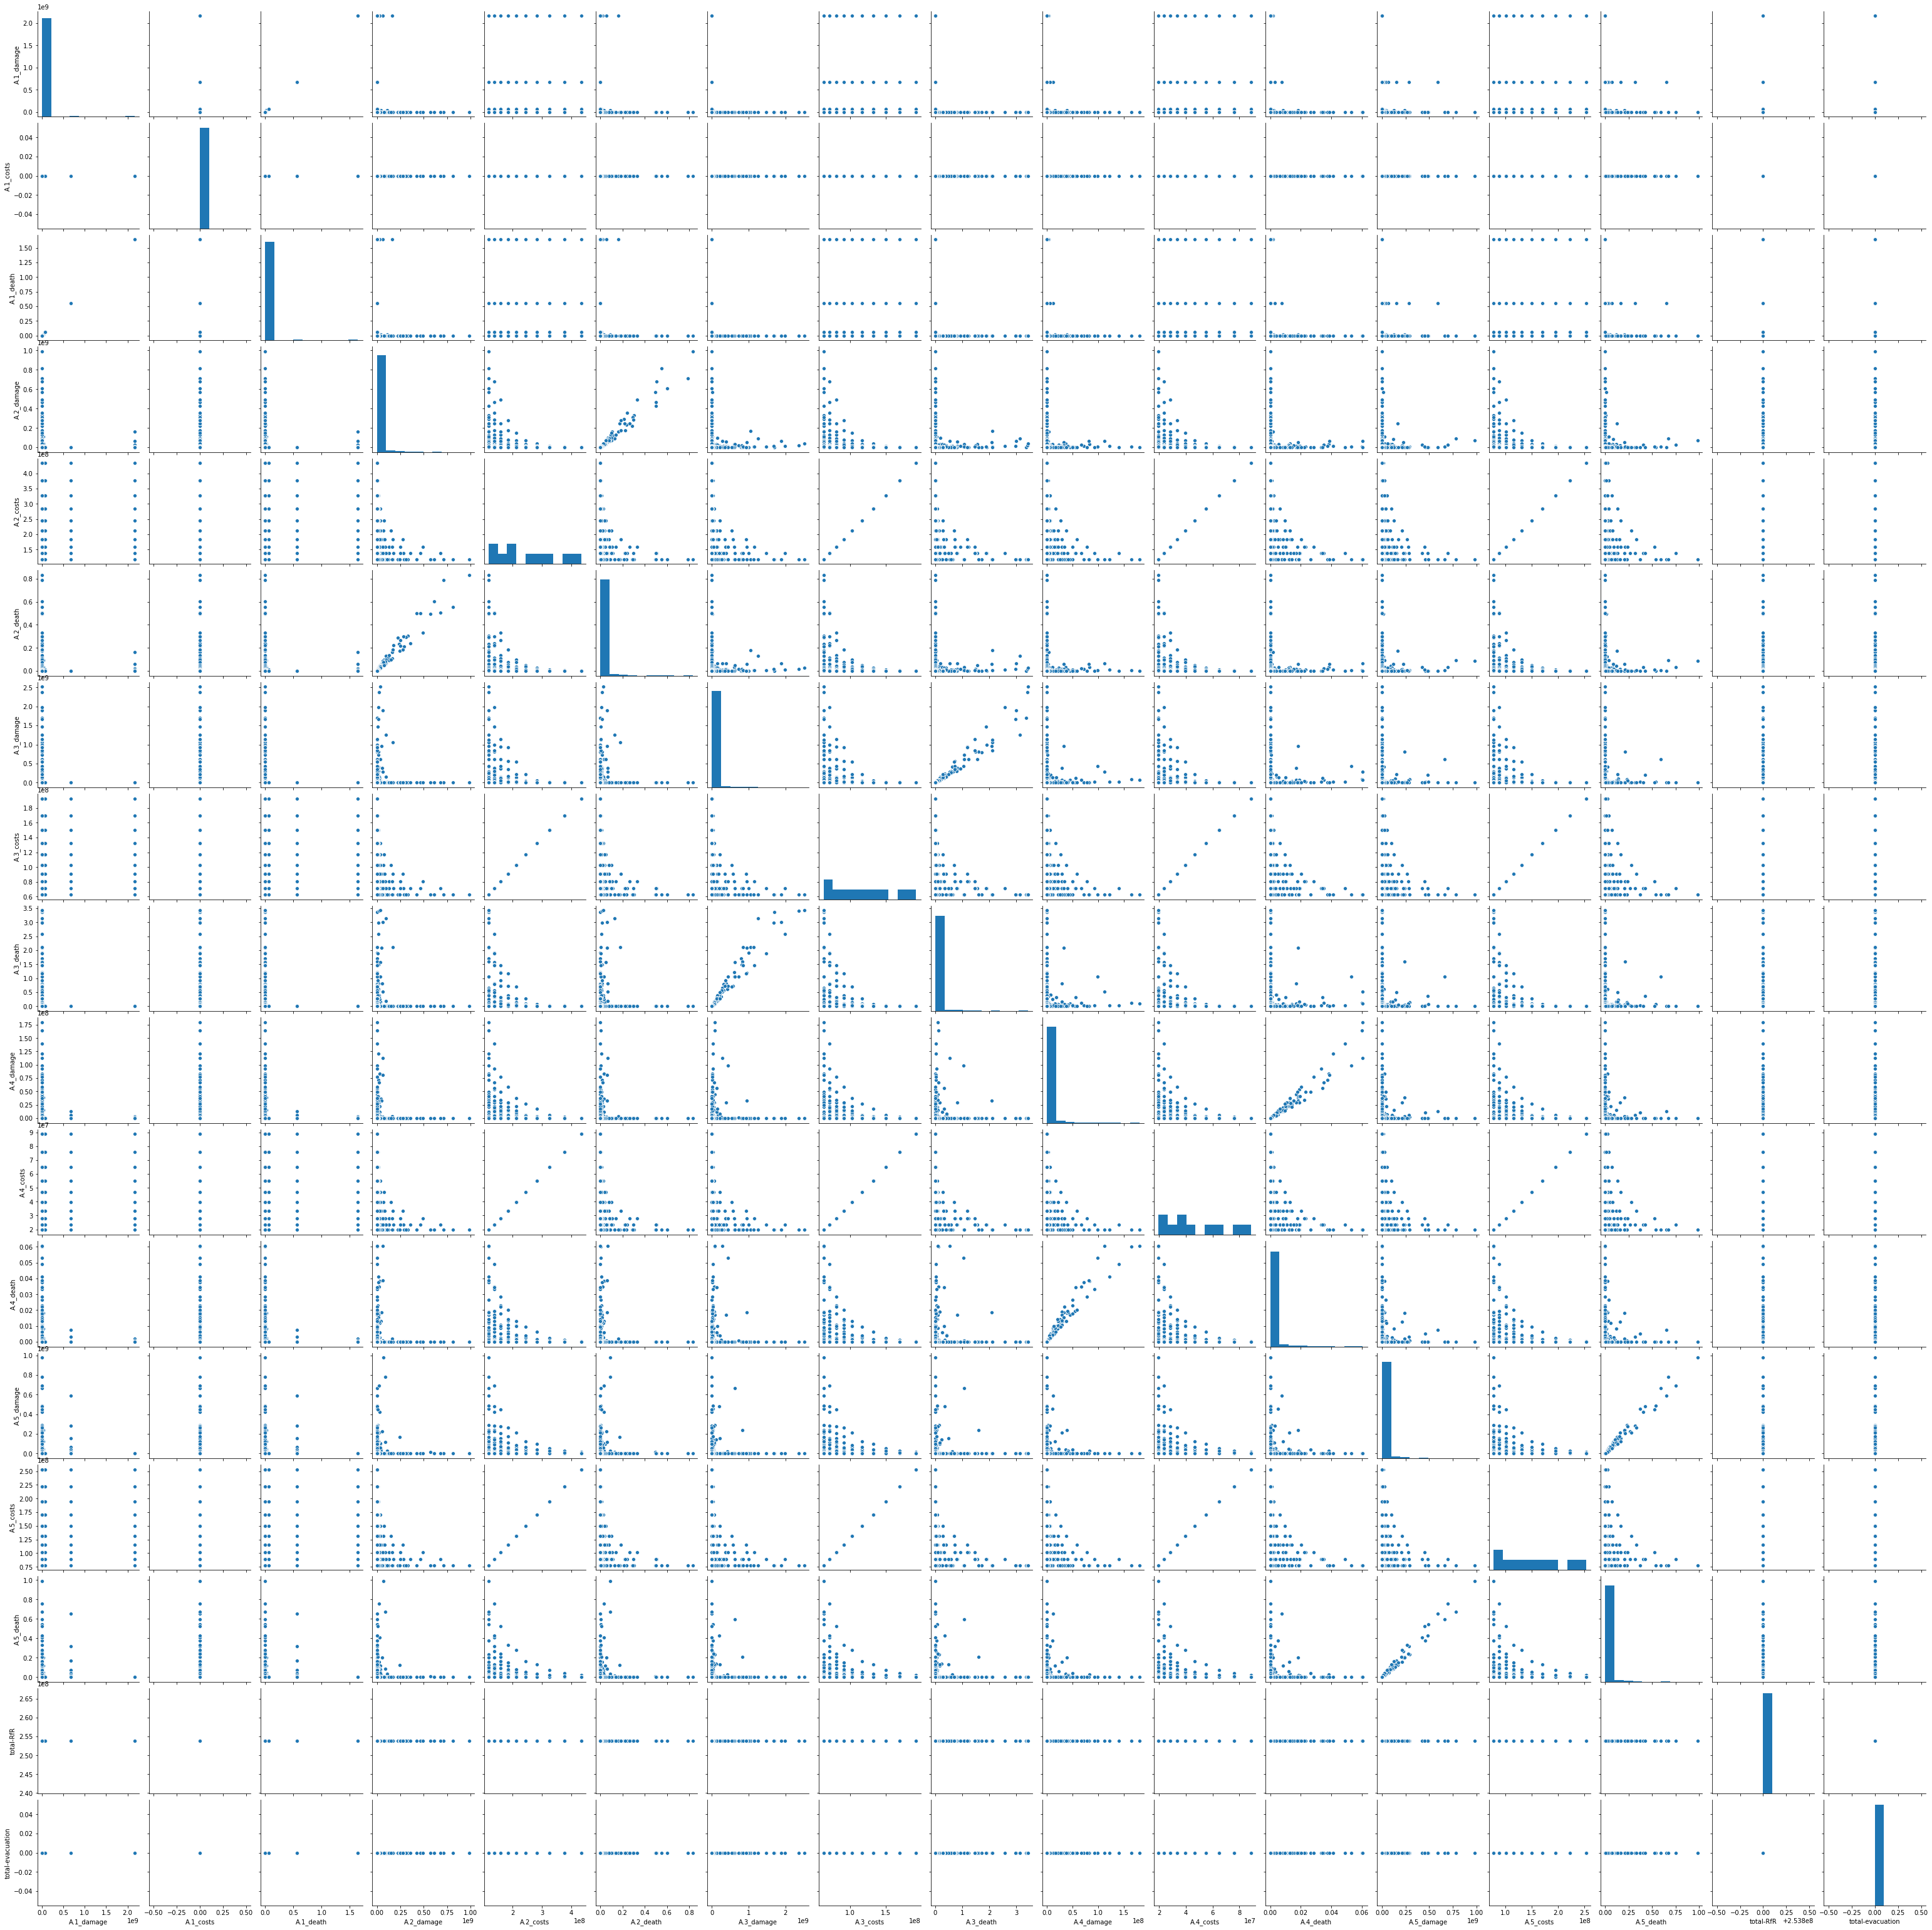

In [66]:
sns.pairplot(data1, vars=list(data1.columns), diag_kind='hist')
plt.show()

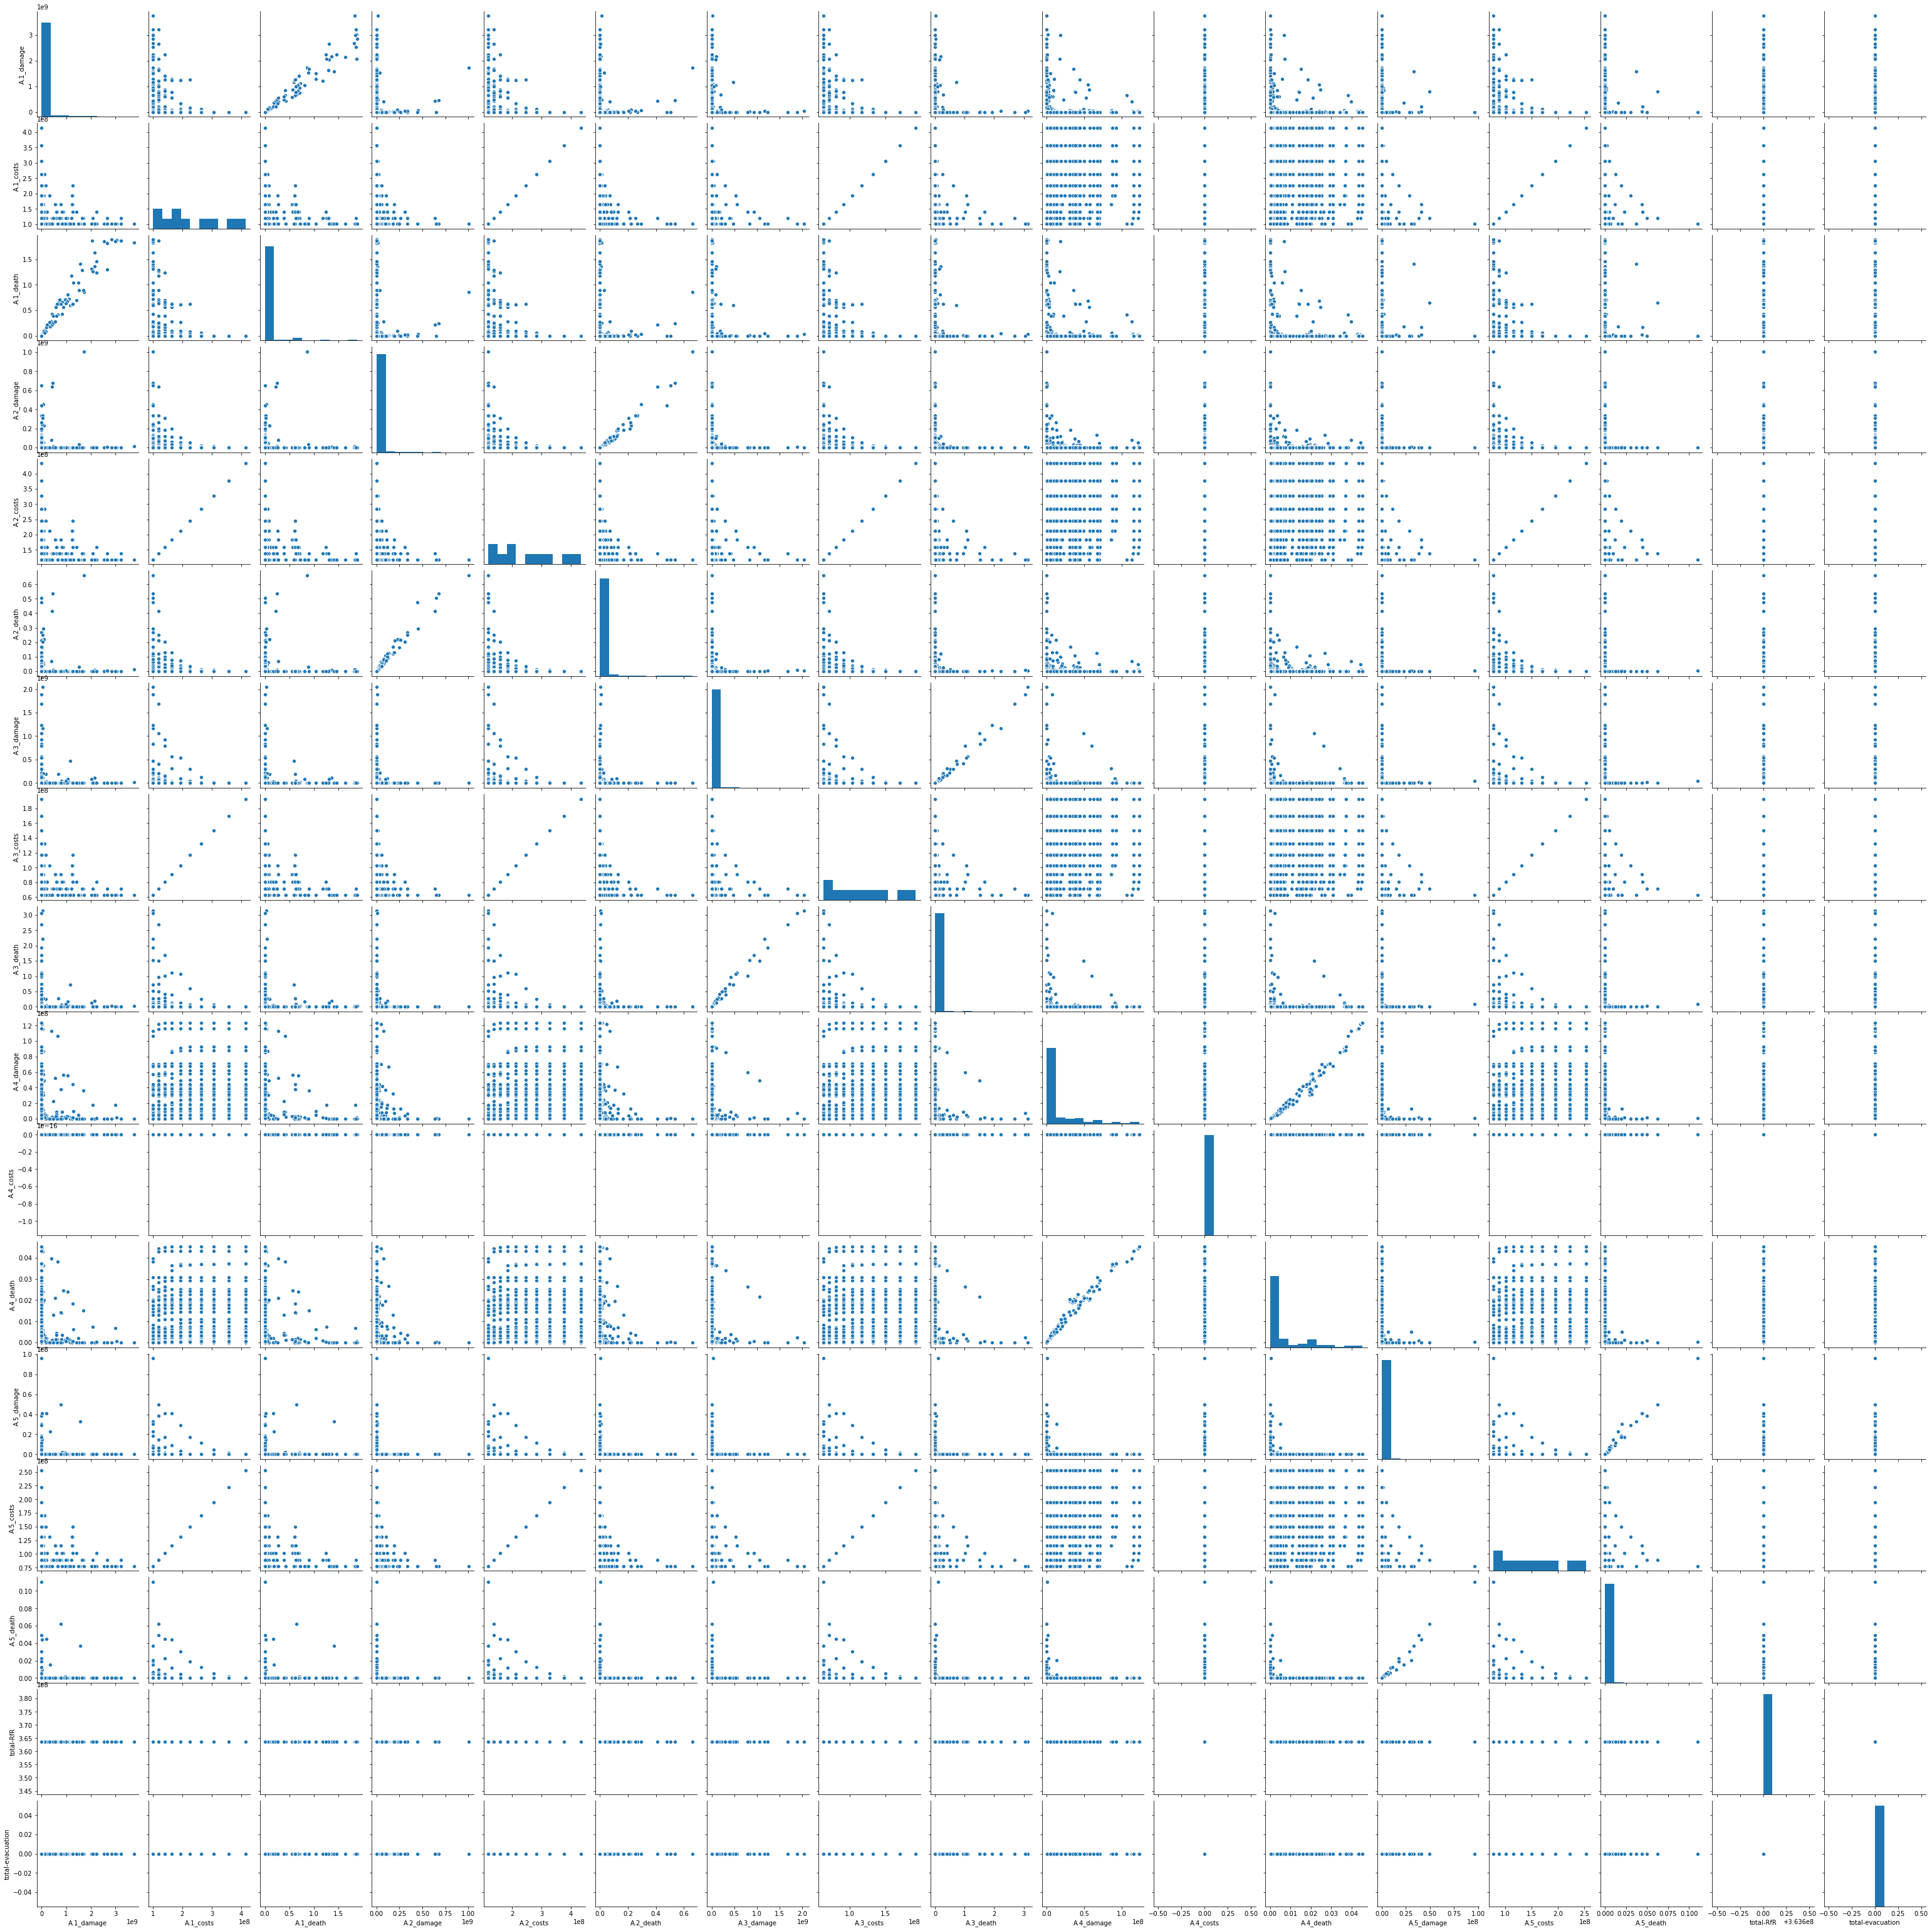

In [67]:
sns.pairplot(data4, vars=list(data4.columns), diag_kind='hist')
plt.show()

In [68]:
dam_list = data1.filter(like='damage').columns
# print(data.filter(like='Damage').columns)
data1['total-damage'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='damage').columns
data4['total-damage'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

dam_list = data1.filter(like='costs').columns
# print(data.filter(like='Damage').columns)
data1['total-costs'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='costs').columns
data4['total-costs'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

dam_list = data1.filter(like='death').columns
# print(data.filter(like='Damage').columns)
data1['total-death'] = data1[dam_list].sum(axis=1)
data1.drop(columns=dam_list, inplace=True)

dam_list = data4.filter(like='death').columns
data4['total-death'] = data4[dam_list].sum(axis=1)
data4.drop(columns=dam_list, inplace=True)

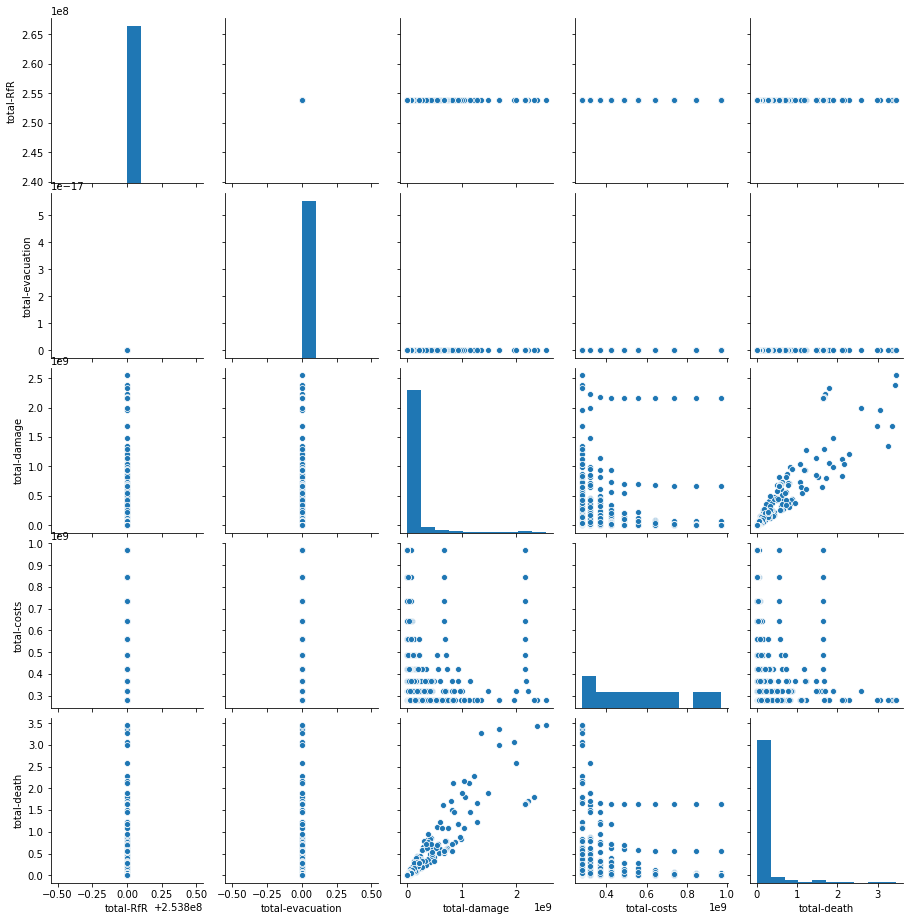

In [69]:
sns.pairplot(data1, vars=list(data1.columns), diag_kind='hist')
plt.show()

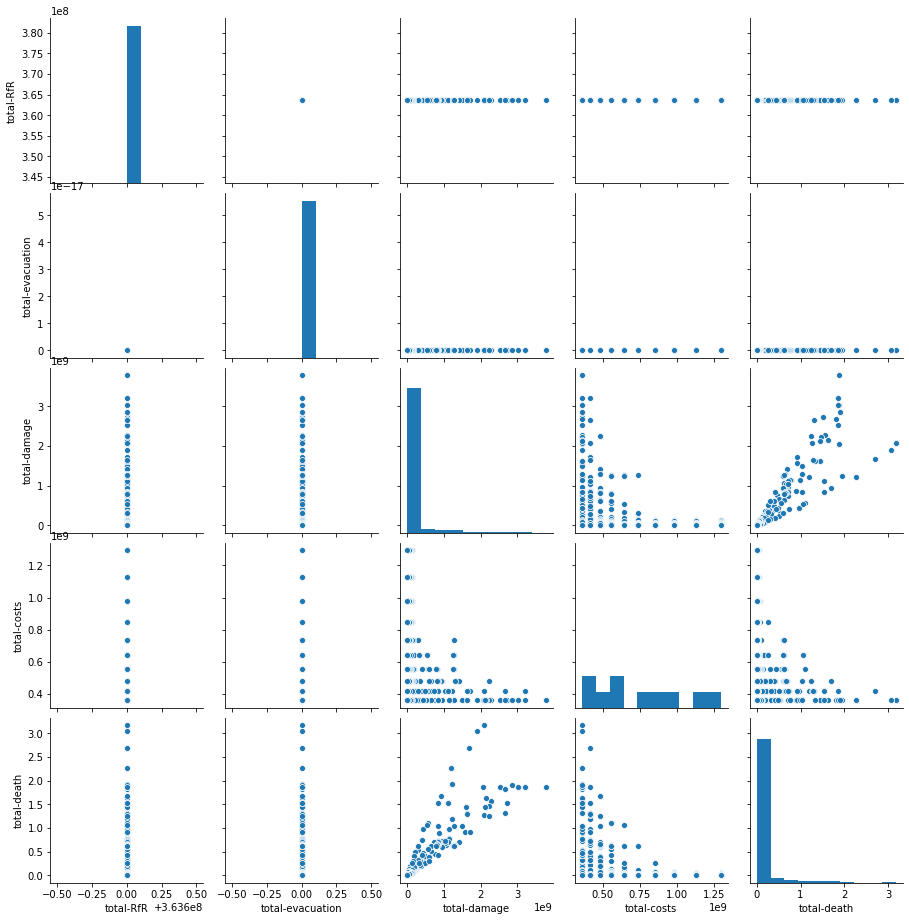

In [70]:
sns.pairplot(data4, vars=list(data4.columns), diag_kind='hist')
plt.show()

In [61]:
np.sum(data1['total-death'] > 0.1)

340

In [62]:
np.sum(data4['total-death'] > 0.1)

340

In [43]:
dike_model.n = 80
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 100,               #500
                                            policies=pols_request_1, reporting_interval=100)
save_results(results, './requestbridges1-80years.tar.gz')
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 100,               #500
                                            policies=pols_request_4, reporting_interval=100)
save_results(results, './requestbridges4-80years.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 10 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/requestbridges1-80years.tar.gz
[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 10 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO]

In [ ]:
results = load_results('./requestbridges-80years.tar.gz')